## Filling missing values with Scikit_Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params

from sklearn.model_selection import train_test_split

In [2]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [3]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [6]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [7]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [8]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant',fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer(something that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features),
                            ('door_imputer',door_imputer, door_features),
                            ('num_imputer', num_imputer, num_features)])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [10]:
car_sales_filled = pd.DataFrame(filled_X, columns = ['Make', 'Colour','Doors', 'Odometer (KM)' ]) 
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [11]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [12]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [14]:
# Now we have got our data as numbers and filled (no missing values)
# let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(transformed_X,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## Choosing the Right Model for the Data

Scikit learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another

* Regression - predicting a number

In [15]:
# Picking a machine learning dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [16]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# How many samples?
len(boston_df)

506

In [18]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop('target', axis =1)
y = boston_df['target']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.6662221670168521

In [19]:
## How to improve this Score
## Go to the table

In [20]:
## Try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test,y_test)

0.8654448653350507

### Choosing an estimator for a classification problem

In [21]:
heart_disease = pd.read_csv('heart-disease.csv') 

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
len(heart_disease)

303

Consulting the map and it says to try Linear SVC

In [24]:
# Import the LinearSVC estimator class

from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis =1)
y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\GurkirpalSingh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [25]:
# Import the RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis =1)
y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

### Fit the model/ algorithm on our model and use it to make predictions

### Fitting the model to the data

In [26]:
# Import the RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis =1)
y= heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Make predictions using a machine learning model

2 ways to make predictions:

    1. predict()
    2. predict_proba()

In [29]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Make predictions with predict_proba()

In [32]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [33]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

 #### predict() can also be used for regression models

In [34]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis = 1)
y = boston_df['target']
 
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [35]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [36]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [37]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# #Evaluating machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metric function

### Evaluate the model using 'score' method

In [38]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)



RandomForestClassifier()

In [39]:
clf.score(X_train, y_train)

1.0

In [40]:
clf.score(X_test, y_test)

0.8524590163934426

Let do the same but for regression...

In [41]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= boston_df.drop('target', axis = 1)
y = boston_df['target']
 
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

## Evaluating a model using the 'scoring' parameter


In [42]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)



RandomForestClassifier()

In [43]:
clf.score(X_test, y_test)

0.8524590163934426

In [44]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [45]:
cross_val_score(clf, X, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [46]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [47]:
cross_val_score(clf, X, y, cv=5, scoring =None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Evaluating  a classification model


1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [48]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [49]:
np.mean(cross_val_score)

0.8248087431693989

In [52]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100: .2f} %')

Heart Disease Classifier Cross-Validated Accuracy:  82.48 %


#### Area under the receiver operating characterstic curve (AUC/ ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate(tpr) versus a model false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [54]:

from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

# make predictions with probabailities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [55]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [56]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

#### Create a function for plotting ROC curves

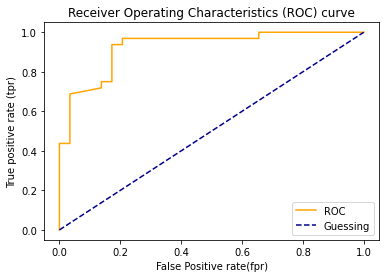

In [59]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
#Plot a ROC curve given the false positive rate (fpr)
# and true positive rate (tpr) of a model.
        
    # Plot roc curve
    
    plt.plot (fpr , tpr, color = 'orange', label ='ROC')
    
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle= '--', label = 'Guessing')

    # Customize the plot
    plt.xlabel('False Positive rate(fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

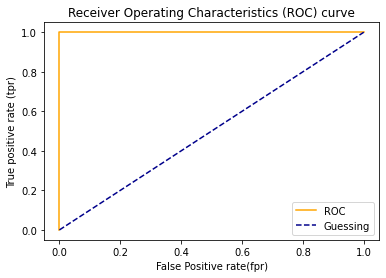

In [61]:
## Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [62]:
## Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0